# CSE474/574 - Programming Assignment 1

For grading, we will execute the submitted notebook as follows:

```shell
jupyter nbconvert --to python PA1Script.ipynb
python PA1Script.py
```

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle

## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [2]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [3]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #w = np.zeros((X.shape[0],1))
    
    X_transpose = np.transpose(X)    
    calc = np.linalg.inv( np.matmul(X_transpose, X) )     
    w = np.matmul(np.matmul(calc, X_transpose), y)
    
    return w

In [4]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #rmse = 0
    
    w_transpose = np.transpose(w)
    n = len(Xtest)
    summation = 0;
    for i in range(n):
        sub = np.subtract(ytest[i], np.matmul(w_transpose, Xtest[i].reshape(-1,1)))
        summation = np.add(summation, np.square(sub))
    
    rmse = np.sqrt(summation/n)
    return rmse

In [5]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 138.20
RMSE with intercept on train data - 46.77
RMSE without intercept on test data - 326.76
RMSE with intercept on test data - 60.89


### Problem 2 - Linear Regression with Gradient Descent

In [6]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [7]:
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y      
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #error = 0

#     Alternative Code    
#     w_transpose = np.transpose(w)
#     n = len(Xtest)
#     summation = 0;
#     for i in range(n):
#         sub = np.subtract(y[i], np.matmul(w_transpose, X[i].reshape(-1,1)))
#         summation = np.add(summation, np.square(sub))
    
#     error = summation/2
    
    
    calc = np.subtract(y, np.matmul(X, w).reshape(-1,1))
#     print("np.matmul(X, w) : "+ str(np.matmul(X, w).shape))
#     print("calc : "+ str(calc.shape))
    calc = np.subtract(y, np.matmul(X, w).reshape(-1,1))
    error = .5 * np.matmul(np.transpose(calc), calc)
    
    return error


In [8]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   
    
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE 

    #error_grad = np.ones((X.shape[1],))
    x_transpose = np.transpose(X)
    first_seg = np.matmul( np.matmul(x_transpose, X), w).reshape(-1,1)
    second_seg = np.matmul(x_transpose, y)
    error_grad = np.subtract(first_seg, second_seg).reshape(-1)
    return error_grad

In [9]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

Gradient Descent Linear Regression RMSE on train data - 47.95
Gradient Descent Linear Regression RMSE on test data - 55.50


## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [10]:
print('PROBLEM 3')
print('----------')

PROBLEM 3
----------


In [11]:
def predictLinearModel(w,Xtest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # Output:
    # ypred = N x 1 vector of predictions

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #ypred = np.zeros([Xtest.shape[0],1])
    
    
    
    n = Xtest.shape[0]
    w_t = np.transpose(w)
    ynew = np.zeros([Xtest.shape[0],1])
    for i in range(n):
        if np.dot(w_t,Xtest[i])>=0:
            ynew[i]=1
        else:
            ynew[i]=-1   

    return(ynew)

In [12]:
def evaluateLinearModel(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # acc = scalar values

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    acc = 0
    n = Xtest.shape[0]
    w_t = np.transpose(w)
    ynew = np.zeros([Xtest.shape[0],1])
    for i in range(n):
        if np.dot(w_t,Xtest[i])>=0:
            ynew[i]=1
        else:
            ynew[i]=-1 
    for i in range(1,n):
        if ynew[i] == ytest[i]:
            acc = acc+1
    return acc   

In [13]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

Perceptron Accuracy on train data - 83.00
Perceptron Accuracy on test data - 83.00


### Problem 4 - Logistic Regression Using Newton's Method

In [14]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [25]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    w_transpose = np.transpose(w)
    n = len(X)
    
    summation = 0;
    for i in range(n):
        #print("X[i] : " + str(X[i].shape))
        exp = np.matmul( np.matmul(-1*y[i], w_transpose), X[i].reshape(-1,1))
        calc =np.log( 1 + np.exp(exp))
        summation = np.add(summation, calc)
    
    error = summation/n
    #print("error : " + str(error[0]))
    #error = 0
    return error

In [26]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)

    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #gradient = np.zeros((w.shape[0],))
    w_transpose = np.transpose(w)
    n = len(X)
    
    summation = 0;
    for i in range(n):
        exp = np.matmul( np.matmul(y[i], w_transpose), X[i].reshape(-1,1))
        first_seg = np.divide(y[i], (1 + np.exp(exp)))

        calc = np.dot(first_seg[0], X[i].reshape(-1,1))
        summation = np.add(summation, calc)
    
    
    gradient = -1 * summation/n
    #print("gradient : " + str(gradient.reshape(-1).shape))
    return gradient.reshape(-1)

In [27]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    w_transpose = np.transpose(w)
    n = len(X)
    
    summation = 0;
    for i in range(n):
        r_x = X[i].reshape(-1,1)
        exp = np.matmul( np.matmul(y[i], w_transpose), r_x)
        first_seg = np.divide(np.exp(exp), np.square(1 + np.exp(exp)))
        second_seg = np.matmul(r_x, np.transpose(r_x))
        calc = np.dot(first_seg[0], second_seg)
        summation = np.add(summation, calc)
    
   
    
    hessian = summation/n
    #print("hessian : " + str(hessian.shape))
    #hessian = np.eye(X.shape[1])
    return hessian

In [28]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

Logistic Regression Accuracy on train data - 83.00
Logistic Regression Accuracy on test data - 85.00


### Problem 5 - Support Vector Machines Using Gradient Descent

In [29]:
print('PROBLEM 5')
print('----------')

PROBLEM 5
----------


In [30]:
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta = learning rate
    # Output:
    # weight vector, w = d x 1
    
    # IMPLEMENT THIS METHOD
    #w = np.zeros([X.shape[1],1])
    
    w = np.zeros([X.shape[1],1])
    n = np.size(y,0)
    for t in range(T):
        i = np.random.randint(n)
        #print("Xi" + str(X[i].shape))
        x = np.transpose(X[i:i+1,:])
        if (y[i] * (np.matmul(np.transpose(w), x))) < 1:
            w = w + (eta * y[i] * x)
    return w

In [31]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

SVM Accuracy on train data - 85.00
SVM Accuracy on test data - 85.00


### Problem 6 - Plotting decision boundaries

In [32]:
print('Problem 6')
print('---------')

Problem 6
---------


In [33]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

Text(0.5, 1.0, 'SVM')

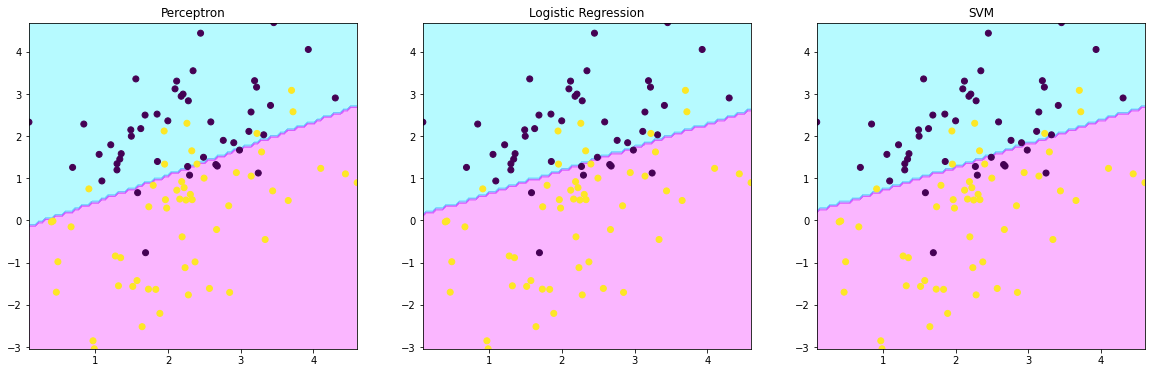

In [36]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Replace next three lines with code for learning w using the three methods
# PLUS,if needed, you can add at most extra 2 lines for each model.
#w_perceptron = np.zeros((Xtrain_i.shape[1],1))

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.  
w_init = np.zeros((Xtrain_i.shape[1],1))
w_perceptron = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts).x
# print("w_perceptron : " + str(w_perceptron))

#w_logistic = np.zeros((Xtrain_i.shape[1],1))
w_logistic = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts).x
# print("w_logistic : " + str(w_logistic))

#w_svm = np.zeros((Xtrain_i.shape[1],1))
w_svm = trainSGDSVM(Xtrain_i,ytrain,200,0.01)

fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')
